In [64]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [128]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal",
                      input_shape = (10,10,3) ),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [129]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

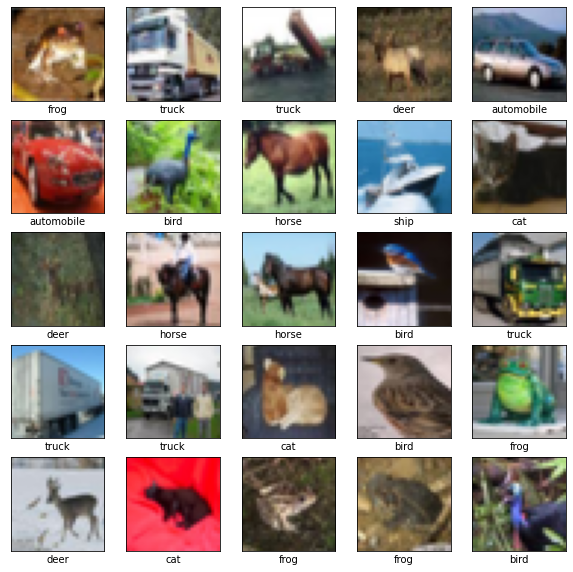

In [130]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [145]:
model = models.Sequential([
    layers.Rescaling(1.255),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [125]:
model.summary()

ValueError: ignored

In [146]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 128s 81ms/step - loss: 1.4513 - accuracy: 0.4737 - val_loss: 1.0922 - val_accuracy: 0.6073
Epoch 2/25
1563/1563 [==============================] - 126s 80ms/step - loss: 1.0418 - accuracy: 0.6322 - val_loss: 0.9277 - val_accuracy: 0.6745
Epoch 3/25
1563/1563 [==============================] - 129s 83ms/step - loss: 0.9074 - accuracy: 0.6794 - val_loss: 0.9206 - val_accuracy: 0.6830
Epoch 4/25
1563/1563 [==============================] - 127s 81ms/step - loss: 0.8108 - accuracy: 0.7139 - val_loss: 0.8327 - val_accuracy: 0.7152
Epoch 5/25
1563/1563 [==============================] - 126s 81ms/step - loss: 0.7494 - accuracy: 0.7361 - val_loss: 0.8288 - val_accuracy: 0.7114
Epoch 6/25
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6921 - accuracy: 0.7564 - val_loss: 0.7630 - val_accuracy: 0.7370
Epoch 7/25
1563/1563 [==============================] - 129s 82ms/step - loss: 0.6436 - accuracy: 0.7752 - val_loss: 0

313/313 - 6s - loss: 0.9491 - accuracy: 0.7433 - 6s/epoch - 20ms/step


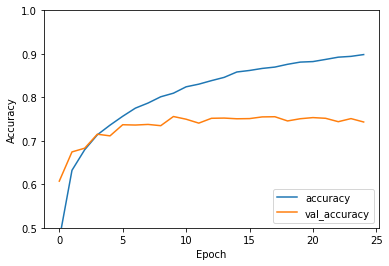

In [147]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [148]:
# load the trained CIFAR10 model
from keras.models import load_model

def load_image(filename):
	img = load_img(filename, target_size=(32, 32))
	img = img_to_array(img)
	img = img.reshape(1, 32, 32, 3)
	img = img / 255.0
	return img

In [149]:
#https://stackoverflow.com/questions/72479044/cannot-import-name-load-img-from-keras-preprocessing-image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

Image 1

1/1 [==============================] - 0s 21ms/step

Prediction: This image most likely belongs to airplane


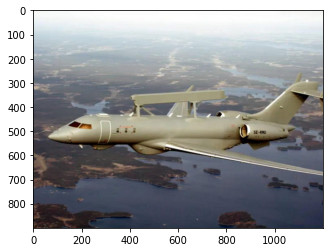

In [153]:
# get the image from the internet
URL = "https://www.zdnet.com/a/img/resize/071727877ee9884b60edd728253d2baadcb3985f/2021/02/23/19631992-64df-4af9-a288-a0cb4112e682/bombardier-globaleye-jet.jpg?width=1200&height=900&fit=crop&auto=webp"
picture_path  = tf.keras.utils.get_file(origin=URL)
img = load_image(picture_path)
result = model.predict(img)

# show the picture
image = plt.imread(picture_path)
plt.imshow(image)

# show prediction result.
print('\nPrediction: This image most likely belongs to ' + class_names[int(result.argmax(axis=-1))])

Image 2

1/1 [==============================] - 0s 19ms/step

Prediction: This image most likely belongs to bird


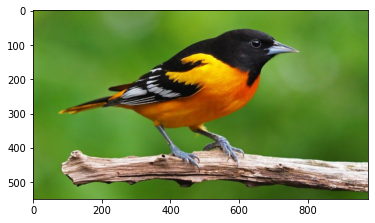

In [157]:
# get the image from the internet
URL = "https://ichef.bbci.co.uk/news/976/cpsprodpb/67CF/production/_108857562_mediaitem108857561.jpg"
picture_path  = tf.keras.utils.get_file(origin=URL)
img = load_image(picture_path)
result = model.predict(img)

# show the picture
image = plt.imread(picture_path)
plt.imshow(image)

# show prediction result.
print('\nPrediction: This image most likely belongs to ' + class_names[int(result.argmax(axis=-1))])

Image 3

1/1 [==============================] - 0s 20ms/step

Prediction: This image most likely belongs to bird


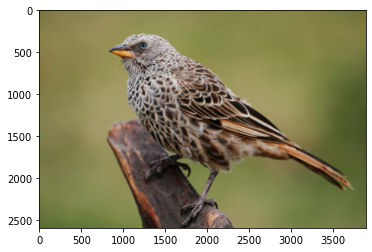

In [158]:
# get the image from the internet
URL = "https://upload.wikimedia.org/wikipedia/commons/5/53/Weaver_bird.jpg"
picture_path  = tf.keras.utils.get_file(origin=URL)
img = load_image(picture_path)
result = model.predict(img)

# show the picture
image = plt.imread(picture_path)
plt.imshow(image)

# show prediction result.
print('\nPrediction: This image most likely belongs to ' + class_names[int(result.argmax(axis=-1))])

Image 4

1/1 [==============================] - 0s 22ms/step

Prediction: This image most likely belongs to cat


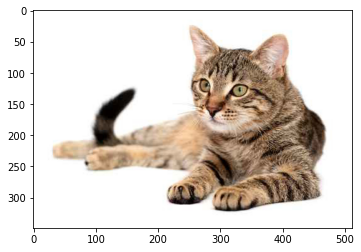

In [161]:
# get the image from the internet
URL = "https://wagznwhiskerz.com/wp-content/uploads/2017/10/home-cat.jpg"
picture_path  = tf.keras.utils.get_file(origin=URL)
img = load_image(picture_path)
result = model.predict(img)

# show the picture
image = plt.imread(picture_path)
plt.imshow(image)

# show prediction result.
print('\nPrediction: This image most likely belongs to ' + class_names[int(result.argmax(axis=-1))])

Image 5

1/1 [==============================] - 0s 22ms/step

Prediction: This image most likely belongs to automobile

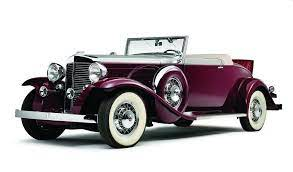

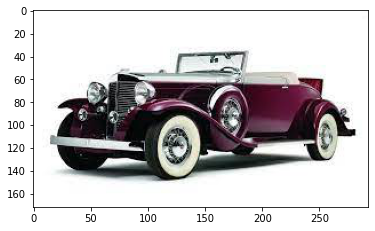

In [176]:
# get the image from the internet
URL = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFBgUFRQZGRgaGxsYGhobGBsbIhsZGxkbGhsbGhsbIy0kGx0qHxoYJTcmKi41NDU0GyM6PzozPi0zNDEBCwsLEA8QHxISHzMjJCozMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMxMzQzMzMzMzMzMzM1MzMzMzMzMzMzM//AABEIAKwBJQMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYDBAcCAQj/xABFEAACAQIDBAcCDAIKAgMAAAABAgMAEQQSIQUGMUEHEyJRYXGBMpEUI0JDUnKCkqGxwdEVYjNEU1SissLS4fAWoyRjg//EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/8QAIhEBAQACAgICAwEBAAAAAAAAAAECESExAxITYSJBURQE/9oADAMBAAIRAxEAPwDs1KUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoPJUHlSvVKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBWKWQKpZjYAEk9wAuTWWoDfKfJgpiOJTKOXtafleiV5bfLAjjN/65f9tYl32wR0WVmOp0R+A4k3GgrDsPYkccCBo0LWuSUUm5JPE1JrgYxwjQeSqKqbqHbpG2eDYS3Phl/DXWvD9JGDHKQ91lQ3/wAVTywW4AW7gOH/ABVW3n2VipcSjRRqUjiLo7FSOvDOUUqzC9iEYEiwN734US2tl+kbDgE9TiLAXJ6s8PMXrXxPSVCrFBBKzDiFUtyBBuoIKkEWPA1N7BhxAw6DFMGms2cjLY9tsvsAL7OUaCtTZe7EOGdpI1axuMpIIUFs3Z0ubEm1ybAm3dRd1qw79yOMy7OxRB1B6tgCONwWUAi3Op/YO2DiUEmTKpFxrc8bWPjx4d1a2236vDyve1kYA9xYZVPvIrPuxh8kQFrWCgjxAufxaipulKVFKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKVH43bGHhYJLPHGzeyHdVJ1toGPfW3HIGAZSCDqCCCCPAjjQZKjZdo3Nocrm/aNzYeoBufKvm0sXCmkroo45WYC/iQeNcD6Q4Gn2jPNFZ0PVZCGVeyIUF7EgjUG3rVR3p9sJGfj5I476LdrEn1rMm2MOeEyH7VfnDB7Q2pF/RyzW4ZTIJFPmjMyn3VZd29tRuWXG7MYtpaXCoYDmJ1MmR0S545gRwOnOhy7Z/FYf7VPfWDHbbijRnVs5HBUIJY+FVhcdgogEkjkjsNOuLMTfhZ87Z/O5v31lXbGzv7RPe370JMr1E5srbqyLeRRE2vZZweBtx08/WovffEJJAsaOrZpFvZhoARe55aE1iG1Nn/2ifeb969jHYA/Ox/fb96hcctdJc7ThjQZn5DRVd9fJAa05d54R7Mc7/ViYf57VrrNgT85F98/vXsDBH5yL7/8AzRPXL+NaTfRBwwmK9UUf6jWJ99xewwcp77lRpbkDqfwreEOD5SJ6SV8fB4VvnEP/AOgP42qmskJtbfDEOEWDCyopPxj9X1jqv/1LlKF+Pt6cNDXjCbXYnKmJx6ueHwnDw5CeQbIikAkjgb1Ky4XA5c10NwDfOAa+bPfDZiBIgA+nICvuYkGictb+Ivio2gkkguWVrxuG6wRuHYKAb2y5dTwYWPEVasBiY1SxYAkkkX8f2tVWbaPXSubJkj7AkHAjOAVRja2mUmwYWzAkaCtuJ1IB0JIBOvM+tSrOO1n/AIjF9Me4/tT+JRfS/wALftVfFu786+2HiPK36g1OVT38Sj+kfun9q+/xCP6R+637VAgeJ/w/tXwSlSL6gm2vHgefDw4cxU3VmlkixCt7J/T86zVCRvYgjzFc+2j0k4+B3STBxDISpa75SQbaNw19+tNtzx3Lp1ylcdi6X5+eDjPDhKw48vZNWPdTpDOMxS4VsL1bMrNmEucAKL6jIOPCruLl4c8Zuzh0ClKVXMpSlApSlApSlApSo/am1oMMueeZI15F2C38FB1Y+AoN+sWIlWNGdjZVUsx7gouT7hVKxXSrsxCQsryfUjb82y1E7V6VcBNBLFlnHWRul+rXTMhW/teNF1UjtzZEjM0sa5pCM5INnLclF+IUctDxtY61X8Xtp8PjE+DKkb5Q+KQB1WVsrSOShshfJlfOAGvcE6EVObUaKQLPAXMpAa4IKlCt7sSLBSpFjzvVC3kIaeOONDNiXCDq1FrPfMAcui5UC+tydBVc5f0w9Im0lmxzOD2Wji0bKQLKTlsyldCxPEateoeVkDkNl9mMWJiFrIPpuB7gRpxrHvRA8OKeN2BdQisVvqyqAwBUgkAi17cuFbpgIdwM+rk3XrSOOnsFQdLcWvRprCGNtVEZ8B1JPuSFzXYdhbKjXDw9Xk1QEk2Fz8o9m1iWza2GmUchbkbuyasWt3sWA9zYn9K67u9sbCz4OFnZnJjUjKw048MpINjccxdTQbc80HYwmKjUpJnyGwZVKgE68VzBrgj+a/jxjfjYUeDxRjjctGyiRDlvZToVvcXsRfyK1a9sYj4DikVrOynMqWXMUOZbnIt2kJvxHKqhvZJNNN1kyLGWGil0BCjRboGLLpbjxNz5P06+OZIDKvefuj96ZV7z90f7qlcPu7iZBdInIPBskuX72TL+NZjupihxjvrra7EDvsovR11f4iocOH1u1hxOUe4drjXstEt9CT5aepvr6EVtbbhaMiPq3VFHEqVzeJvUQT4Vds3LTb+Ejk1h3dWPzLE/jWWOTMbXNrasuZSuttVuc2pGnE3AuKj/AErqHRJu2ssvXyKCsIVwCLgzPcofsR2YD6UoPKo53Ktzdjo6IQTYx2jWwIjvd7cusJBVCfoKpbgM19KksdhtjKrRsYEPC5mcuD45WJQ+Z9KrfSJvq2KmOGwshECkqWU261+DEEa5RwHfqdQRUZDu2I0TOLuwzBQy3C94QHrH1IHZU8RVjeOE1vKtHeLZYQNJhsQZYx7VpCxUE2vcWzJra5AIvrfjUSdqz3Px0nH6bflepZgcLKHy5lIsyE3EkbaML81IuL8iO8VFbXwYilZFOZNHjb6SOAyHzyke6ldpjN77ek2xiB8/J99v3rYTbuKHDES/faolayrUd8cYlxt/F/3mT75qRh3lbqsrviGkIPb68BQdctkyE29m4vrbiL1W1rKKulvjxqcTePGf3qX75rPh9rSk3Zg9+JdQxN+NzofxqAQ1uRyhRdjYVdR0uGOuk9NsiOQCRVCEG5C3yk87odU4cQW46gca3uiuBjtRywsUgYnzZoxy0N7sbjQ1XcPtlRwci3MggVadxt5cJh8TI0sy2eNVEgD2BD3yEFQdb3vawsddRbFkeby5Zelx7dnpWjs/akM65oZUcfysD7xxFb1HgKUpQKUpQKUpQRe3psQkDthYlkmtZFZgoudLsSRoONr62tpxrieO6OtsYl2nnCvIdTnmUsf5Vy9lR3C4Ar9AVR+kTfldnoI0s2JcXRTwReGdwOVwbDnY91BwTaWyZsO7RzRsjrqVbu7weDDxBIqQi2C6RiaeGRUaxDDLYKbZSy3zAG/E24rxvUdPtSWeUy4mRpGZlzFje6g3KgcALE2AsK6FvBi5HEc7SRSZYmMiRqVRWljKojo0hzu1stxbRkIAvc109pNXShYXamIjDRxyuAwyjU3UcsuvZ0004VN4fYMsMDYyPFZJEfIVXMrZiuYsHJAYX0NvHuIqunEx3uYlPI2LAd3I1jfHyG/xjm+rZnLZiNBfv008jRjLvhl2tiXmlzu2Z3CliebOATy7zUzikVnY9lmGXlGfkKecbtVg3VxQTAzdVC7YgqJHlCLkREUKqM2YFT2WKqAbsw0twicdiI7oxR8zojG0gSMsy6lVzKqqRY24XY8rUY2zbJwLSEK0iQoc/wAZJIY1uihmUWjS5ykHSs+F3gnw0XxUqMA7MueQ31CjRXYtl0Y5QwuSNDaqzj9pF1Ea9mMHNksvt2sTmAuRoNL20B41DzSFjry0FHb1mM3easy7VnxEpklma5IJKkKSeQBXha3pV12TsdUjMzyxwA3Oe652vqbu5zcfGuRWrKuIt8hb1ZZHT/Rdak0u21NtwByOseW3PNe/2mNvdWim80K/1VW+tIx/yqKqyI0h7/8AvIVeNidF+KmUPIVhUi4D3L+qDh5Eg+FS5pf+jK9PWH34gtkfBjKeIWdh65XUqa9YjZez8aL4SXqJj83KFQMe5WF0YnuBB8K2dodEmIRS0UySEa5SChPlckH1IqgYzCSQu0cisjqbEEEG/cQaky2xfJvuNnaux58KxSWPLfshrXUnj2WI0PhobV0GPeyHDbLxEMOZJpDGq3uCVkhWNnXn2VhZfBrd9UnZu8siL1b2kjIylHGYFe6x4Acu7lbjWXbskUsMJiRs0ecOSxa0ZyGMaknKpzi407QubmtFx3Nzlsbk7OE2IRSwUXFie8kBQBz7RWrNi9hJiJJFjOYDKDI9u3xcaJmzHODp9FgT31V92ppU7cUIkKMHP8oUPqNe6+nM6c6t+7HXSRhIoksJCFDMcrC4zhirHuZdDrl5X0ieXLlFbbwsnwUmYfHRMA7WtmRyAGvwa+ZTcc43J1LVWMbJ1kULc0DRnyDZl9wZh6VdN/tulogghWNyGSRRm0U6xgZgNQGZuA5W0qiQKWjVR3k/kP1quvhy41WFRWRRWcYU16GHbupp64xqK9gV7WI91eslWOkrytauJcuwRddQo8STb3XrNjXygDmfyFaCuVOYcbG3qLfrUrl5fJxqNuRQ0ixIeyDlB7z8pyPfpU2IEhh6wDVmKJ3uV9t2P0VuBYcSfA1XME5DqV4309RarlsHYL7RnKKxSCJVQvbggvov87tnfwzHuAOd6c8M5MblUPsjeR8LKJElIa/aGpVvBrfpwru+x97cPNhlxJYIC2QjVj1lr5VVQS5I1FgdAe6ua709GEaQtJhHkLouYo5Vs4HHKQos1uXA2tpVE3f200IZczFR21QGwZgrIVY8QuV3OmulJZXlzzud3Y/UWExKSIHQ3U8D5GxBB1BBuCDwtWzVJ6ONvYWeDqYGYOgLujoVKlmNyNSpW+gsxPfV2o5lKUoFKVjlcKpY8ACT5DU0GvtTGrBFJM/sxozt5KCbDxPCvyvtzaUmJnkxEhu7sWPcOSqP5VUADwFdw6Q9pnFbPaLDKzO8iKy2s2RTnJ42Iuqjjzrik+7+MHHCT+kTn8QCKJtpLAco046++vcwcIiszFSCwQsbLdmXReAJsT61IDBTAawyiw1vG4t53FRkzXY3I001P4Vp2smuGI1jcVmCg/KF+Q79bWFudGi0a97gX0W/vN9NPOoxlExsfbk0EhRGBV2UMpzW0KH5JB+QvnlFfNp49zI5vqWa9gACNVVbBVsAoAtci1rcK13wbx4gh7Aq7ZhcaEXsDrx4e+s0kSMSxGpNzqeJq6Xx47u0TiH8LXrCK9TEFjbhfTyrxWWc7u7e4kLGwrbiwV9TwH/f2r1gFspbvNvSpvYWA+ETwwf2jgN9QXL+uUPbzptl0Do03SSONcZKoLtrEDwRP7T6x5Hu151cMVt2JDq6AXy3Z1QEngAWIufKoffLbKwqsCsFuFvYcATlVFA4k2NhzsBccapWM2NGZFyO7yMesfMqkRMtyVZ+sIGoMZAGUW0PfiTfNNuqQY9WNgdbA6dxvbX0PuqudIm7KYvDtKijro1LAge0g1IPeRqR6jnVT3YnlwM6QyLlhkC+1IrgO9rhGFxo1gQORvq2WusYZuX/AG1Zs9bwsr8ruljb0rewEjKMyk3VjblyHD3mtrfDAdRjZ4hwWRiv1Sbr+Fq0cBJa4767St4cZcLluptGG00bEoJo2jbIo0YjRkXirAk9leN+zxAFv3T26mCLrM2aPNo4OcqQozdq5zLzNrW5gVy34LmuyGzfg3gakdmbUjeRBigxydk2OtuFnBBLpz7Nm8eFNNZ4+1+1k6SNoR4hfhSplzgRx39psre01u745bXIFh361TZsNkBPPh+v6VIb0TfCsUsUYAhQZYyPZyADNJ5WAHgFA43qGxuNkMhSFSUTsKApb2dLmw4/tV6ax/CcphFFZlUd1Vw7QnHFCPNGFfRtaf6I+4f3ptr5FnWId1fThh3VWv4xiO5fu2/M15xG1sQyEEgKdDlC8Dpa9zb0q7X5mttHEB5GI9kaL5Dn6m59a1WbhXwCvjgg2NZccsreW1s62c3NrI7L9ZULKPW1dY3eEmG2UhiWzys8rkhjZblEFl1N1QGw5XPgePxe0PMfnXZ8WZI4sLh2jBQfB7aEGTJChYLprZme5F7AnhWci5fhr7TG7O1mmjPWLkdDldb30IujjuDLr+/E8W3swAgxs8aaBXLKAOAcB1HkAwFdmhxmXECJkyl1DA2785A8B8W5FU7fTc/GYnGPNBhmdCqDMHQXZUAOjMD3VmTVcsV+6N4MFJh1xmGhWOR06uUKzHK6kFlyliALgMOdiKu1fnCDcTatwiYaRMxHa6xFA5XbK3C1ds3B2TLhMBDh5gBImfNZsw7UjsLHyIra1ZKUpQK1sdEXjdFtdkZRfhcggX9a2aUHNdrwtgYxLiCFTMFzLmftEEi4UXtodbVq4Pe/Bn+soPrEp/nAq37/AGyDitnzxILvlDoBxLoQ4UeLZSv2q/MLnn/3Wrtn1j9EYTeDDN7OJhbylQ/hepJJY5Lew4uL+ywtfX8K/M0T2uO+3K+o/wCCaySHLa6qbgMPZOh7yOB8OIosxn9fpgbIw7KFkw0T/WiRuPmp0rD/AOMYH+5wKSCOzEqaEWI7IGhFfnSDabJ7LOn1HZfyIrcXeXED2cViR5Tyf7qNev273i90cDIbvAL9+d79/wBKoybo12e17CVb/RlP4BgbVySLfbHCwXFzfaYN7816zr0h7UW3/wAon60cR/0XonXVSu/+5OHwSp8HTEyu+Y3JVkRVtcNlQEk301Hfrwqh5cjDPHcA6i7AHnbMD+Rq5RdKe0l4tE/nEP8ASRXzF9JuJlRklwuEdWFmDRyag+Ik0PjRFfxkaqVCrlUrGwFybdZGjkXOp1Y1b+iuPNjxf5ELuPA3jT/Waps0+cK1gOyi2F9AiBBx8EFXPonlttAj6UDj1zRt+QNZy6qTtvb0YucY6R0iLKHZszISqNEoyEueyO0t/AkG9QMWNxCnqsPA7KWLtkjLdY/Z5oCpyorWy6Evci9db2zDmSaFWVGlRij65i4NwBqOBKn14G+mnuBj0MZw7ECWNnGUgqxXOfksqnQnKbLYEWqxEBtCFMTgJj1TloUMnbUgh0uQUuO6689b8QdblsHaCzIXU3s2U+ByqfyIqE352hHFE+EgyifEEFwqqcqFru8gOhzAMLHiMxsbEVI7l4MxYQXFi7O/oTZL/YVKx5OmsZzw5D0qRD+Jy2tqsd/Pq1qpIuU3uD5Ved8tiY3FY6aaHCyujsUR1QlSI+xcNwGqHiavEvRts2SJHkjbCSMqs6JPmyMQCyXfMDY3FwK1j0svO3JcJLwrffCpIO0NeTDQjyIq4z9HeCjPxe0mUdzKj/iCtR+0N1I0iYx7URpB7K9VkU+BYMxBtzFb26/LjZyq3wk4VgDIC1wcuW+g1BccL3A4amrlhekWVozG8asCLZkP6cvKuayYSUE3U3vqRZrnzHGvWCwOeRRIxRCe0+Ukgc7Aak91TafJvubWvY+7SYyRxExQqMzA2FrmwtxNWKPovJ0Mpt4Bv0q07J342bBEkUeZVRQoupvYc2NtTzJ7zUrH0g4E/O28wazamWdqoYboiiOrO3uP6mpCHolwo4u59FFWmPfPBH54etbUe82EbhOnvowq8fRVgRxVz9oD8hWvtjcfAYZA/wADkm1YEIcxUKjOWbMQAtkIv3so51eU2zhzwlT31lOKiYEZ1IIsRcag1R+fNo7d2W8bLBs5ke3YkLAZT3kKTeug7zY6MR4SVWUNZJk4jNGI1z6jkLqTfTUc7Ecf2/ss4TFy4c6hHIU/SQ6o3qpH410/cjEQ47ArhJgpfD2AB+he6Mtjew0HmviKzlwb40s2ExK4opMoIRCwF7atlym1uIGZx5g91WnZI+LB7yT+Jt+FqgEiEUaRR2ubIgtYXPcByAuT4AnlVqijCqFHAAAeQFqk5u0kZKUpW1KUpQKUr4TQfa4J0q7kthpWxcCE4eRiZAB/ROxub9yMTcHgCbadmu6SykcBeovG4qQgr1YIIIIIuCDxBHMUTb8qEV9D+XqAa6lvF0fo7l4UaEk3KAFkve5yqdV8gbDkBVWxG48yfKv9gj9auk3FVJqwbn7sS4+cRpdY1IMkh4IvroWPIevAE14k3akXjf3VI4bH4yJBHGwRB8lVAF+8958TrTRt2n/w/ZIRUOFgsoC3I7RsLXZhqx7yeNeBu5seP+q4f1QN/mvXGH2xjechNYW2tiebU0brr+09h7EkFnw8S9xjHVH3xkX9ape09x9mG5ixcydwYJIB4D2TbzNU5tpTc/1/esTbTk5j86JutvbWxlw4VUm61TftZMmW1tLZmvfXnyrzuvtP4NjIJybKrZX+owKtfyDX+zWlJtBmFmXStY2Onu8DyrNix+iN4tljExKVco6HPHIpIKNYgG41ykEg+h5Cua4/B7S6ws+HLuCoUq4ZWW1iXcnW2pXNqMwuNCDJ9He+65FwuIfK62VHY6MvJWP0hw8dOddMSRCOXpWJlrirY5/ulukynrMQc76jXXKhbNlJ4FydWI/5a37w7UXCYZ5NLqtkHe50Qe/8Aa2cXjo4UMjsqIouWY2A9a5lvJJidpurRIVw636vN2S5OhkK8r/Jvy151N+1OojE3wnSNY1k7KqFHHkOJ8TxqNxO8Ej+0xPrUtD0fYp+OUev/FbsfRZKeMij0Jrqwp77U/7esD7T8K6HF0Rk+1P7kP8Aurfg6IovlTOfJVH53qmnJXxt+VeOuJ+TXcMN0V4Nfazt5tb8rVK4bo+wCfMA/WJP5mo1p+fFLHwrZgwUr+yrH6qk/kK/SGG3bwqezBGPsipCLCIvBFHkBQ0/OuF3TxknCGU/Zy/5qmsH0dYxuKsv1mX9DXdgg7q+2ounJcJ0Zzj2pwvpepjD9Hrr/W2+4f8AdXQ6UNOcbV6LY8TYyYh86iwcKL242NzqLk1qYHoiETrImPlVl4FUVTbmL3OnhaupUoqA2Nu6sD9a80s8lsoaQr2FPEIqKqre2ptfle1T1faUClKUClKUClKUHy1fCg7q9UoMRhU8qxPgkPFR7q2aUEZLsOFuMa+6tGbdLDN82KsVKJpT5dw8MeRHrWEdH+HHyb+dXWlXZqKcu4+HHzSe6vf/AIfCOEaD7Iq30ptPVSZtzUPsonuqA2v0bvMLBYweTBipHqF18jpXVKU2acLPQ9jL/wBPDbxz3/Bdantl9HO0IhlG1Cg7ljZwPIOwt6V1alZslaUCDo3jZw+KxU+JK6hXKhL9+QA/nVtw+x4k4L7yTUlSrpNMK4dRyrJ1Yr3SivgFfaUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoP//Z"
picture_path  = tf.keras.utils.get_file(origin=URL)
img = load_image(picture_path)
result = model.predict(img)

# show the picture
image = plt.imread(picture_path)
plt.imshow(image)

# show prediction result.
print('\nPrediction: This image most likely belongs to ' + class_names[int(result.argmax(axis=-1))])